In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
#下一行可以让数据集在单元格中嵌入化显示
%matplotlib inline

导入数据集

In [2]:
dataset_test = pd.read_csv('data/testdata.csv')
dataset_train = pd.read_csv('data/traindata.csv')

查看一下导入的数据

In [3]:
dataset_test.head()

,gender,height,weight
0,Male,180,72.0
1,Male,169,68.0
2,Male,181,72.0
3,Male,175,61.0
4,Male,172,55.0


In [4]:
dataset_train.head()

,gender,height,weight
0,Male,175.0,65.0
1,Male,172.0,64.3
2,Male,176.0,63.0
3,Male,175.0,60.0
4,Male,160.0,75.0


In [5]:
dataset_test.shape

(100, 3)

In [6]:
dataset_train.shape

(100, 3)

先处理训练集

In [7]:
#先分开取出男女数据
dataset_male_train = dataset_train[dataset_train['gender'] == 'Male']
dataset_female_train = dataset_train[dataset_train['gender'] == 'Female']

In [8]:
dataset_male_train.head()

,gender,height,weight
0,Male,175.0,65.0
1,Male,172.0,64.3
2,Male,176.0,63.0
3,Male,175.0,60.0
4,Male,160.0,75.0


In [9]:
dataset_female_train.head()

,gender,height,weight
50,Female,168.0,55.0
51,Female,165.3,54.5
52,Female,169.0,57.0
53,Female,163.0,50.0
54,Female,164.0,50.0


In [10]:
dataset_male_train.shape

(50, 3)

In [11]:
dataset_female_train.shape

(50, 3)

In [12]:
body_male_train = dataset_male_train[['height','weight']]
body_female_train = dataset_female_train[['height','weight']]

贝叶斯分类开始

In [13]:
#训练集完成可视化
#先计算总数
count = {}
count['Total'] = dataset_train.shape[0]
count['Male'] = dataset_male_train.shape[0]
count['Female'] = dataset_female_train.shape[0]
print('The cout of training data is:', count)

The cout of training data is: {'Total': 100, 'Male': 50, 'Female': 50}


最大似然估计

使用正态分布，需要计算的内容有均值和方差（或标准差）

In [14]:
print('最大似然估计:')
male_data = body_male_train.describe()
female_data = body_female_train.describe()

'''
describe得到的元素有:
count  元素个数
mean   平均值、期望
std    标准差
min      
25% 
50% 
75%      
max
'''

male_result = {}
male_result['height_mean'] = male_data['height'].mean()
male_result['height_sig'] = male_data['height'].std()**2
male_result['weight_mean'] = male_data['weight'].mean()
male_result['weight_sig'] = male_data['weight'].std()**2

female_result = {}
female_result['height_mean'] = female_data['height'].mean()
female_result['height_sig'] = female_data['height'].std()**2
female_result['weight_mean'] = female_data['weight'].mean()
female_result['weight_sig'] = female_data['weight'].std()**2

print('男生参数:\n\t\t身高\t\t\t体重\n平均值\t{}\t{}\n方差\t{}\t{}\n'. 
      format(male_result['height_mean'], male_result['weight_mean'], 
             male_result['height_sig'], male_result['weight_sig']))
print('女生参数:\n\t\t身高\t\t\t体重\n平均值\t{}\t{}\n方差\t{}\t{}'. 
      format(female_result['height_mean'], female_result['weight_mean'], 
             female_result['height_sig'], female_result['weight_sig']))

最大似然估计:
男生参数:
		身高			体重
平均值	137.760274566641	57.91795779218791
方差	4862.5083883028765	552.6063858235477

女生参数:
		身高			体重
平均值	127.46989618434571	46.176657628860255
方差	4014.777270457238	313.2768508250514


贝叶斯估计

In [15]:
print('\n*************************\n')
print('贝叶斯估计:')

mean0 = 0
sig0 = 1
male_result['height_mean_bayes'] = (1/(count['Male']+male_result['height_sig']))*(body_male_train['height'].sum())
male_result['weight_mean_bayes'] = (1/(count['Male']+male_result['weight_sig']))*(body_male_train['weight'].sum())

female_result['height_mean_bayes'] = (1/(count['Female']+female_result['height_sig']))*(body_female_train['height'].sum())
female_result['weight_mean_bayes'] = (1/(count['Female']+female_result['weight_sig']))*(body_female_train['weight'].sum())

print('男生参数:\n\t\t身高\t\t\t体重\n均值\t{}\t{}\n'.
      format(male_result['height_mean_bayes'], male_result['weight_mean_bayes']))
print('女生参数:\n\t\t身高\t\t\t体重\n均值\t{}\t{}\n'.
      format(female_result['height_mean_bayes'], female_result['weight_mean_bayes']))


*************************

贝叶斯估计:
男生参数:
		身高			体重
均值	1.7723532077281405	5.526658990592229

女生参数:
		身高			体重
均值	1.9807973387664375	7.151019929015685



决策面

In [16]:
#先验概率
P_male = count['Male']/count['Total']
P_female = 1-P_male

In [20]:
#协方差矩阵
male_array = np.array(body_male_train)
female_array = np.array(body_female_train)
sig_male = np.cov(male_array.T)
sig_female = np.cov(female_array.T)

In [21]:
#均值
mean_male = np.array([male_result['height_mean'], male_result['weight_mean']]).reshape(-1, 1)
mean_female = np.array([female_result['height_mean'], female_result['weight_mean']]).reshape(-1, 1)

C:\Users\95826\AppData\Local\Temp\ipykernel_15124\170284738.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sample[i,j] = 0.5 * (np.dot(np.dot((x-mean_male).T,np.linalg.inv(sig_male)), (x-mean_male)) -\
C:\Users\95826\AppData\Local\Temp\ipykernel_15124\170284738.py:19: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(sample_height, sample_weight, sample, 0, color='green', linewidths=2)


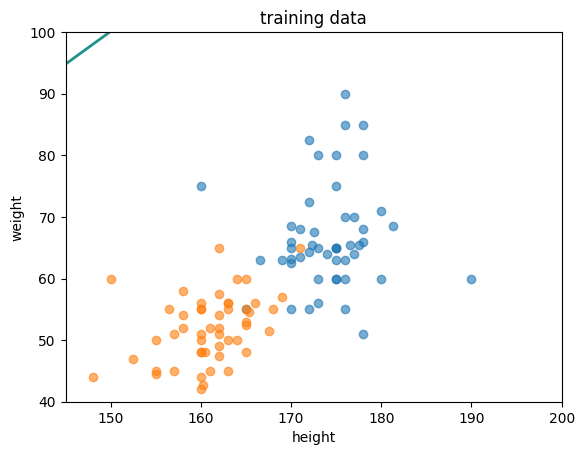

In [26]:
#先画好点
plt.scatter(body_male_train[['height']], body_male_train[['weight']], alpha=0.6)
plt.scatter(body_female_train[['height']], body_female_train[['weight']], alpha=0.6)
plt.xlabel('height')
plt.ylabel('weight')
plt.title('training data')

# 构建决策面
sample_height = np.linspace(145, 200, 50)
sample_weight = np.linspace(40, 100, 50)
sample = np.zeros((50, 50))
for i in range(50):
    for j in range(50):
        x = np.array([sample_height[i], sample_weight[j]]).reshape(-1, 1)
        sample[i,j] = 0.5 * (np.dot(np.dot((x-mean_male).T,np.linalg.inv(sig_male)), (x-mean_male)) -\
        np.dot(np.dot((x-mean_female).T,np.linalg.inv(sig_female)), (x-mean_female))) +\
        0.5 * math.log(np.linalg.det(sig_male)/np.linalg.det(sig_female)) - math.log(P_male/P_female)

plt.contour(sample_height, sample_weight, sample, 0, color='green', linewidths=2)